In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [14]:
df = pd.read_csv("flight_dep_linear.csv")
df.shape
df.head(5)

,DAY_OF_MONTH,CRS_ELAPSED_TIME,DISTANCE,HourlyDewPointTemperature,HourlyDryBulbTemperature,HourlyRelativeHumidity,HourlyVisibility,HourlyWindSpeed,DEP_HOUR_sin,DEP_HOUR_cos,...,DEST_SIT,DEST_SJC,DEST_SLC,DEST_SMF,DEST_SNA,DEST_STL,DEST_STS,DEST_TPA,DEST_TUS,DEP_DELAY
0,1,168.0,1020.0,33.0,36.0,89.0,5.0,10.0,0.990389,-0.138309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0
1,1,160.0,1020.0,33.0,45.0,63.0,10.0,10.0,-0.785317,-0.619094,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,15.0
2,1,299.0,2279.0,37.0,43.0,80.0,10.0,6.0,0.939991,-0.341200,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0
3,1,300.0,2279.0,41.0,49.0,74.0,10.0,6.0,-0.460974,-0.887413,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-3.0
4,1,300.0,2279.0,41.0,45.0,86.0,10.0,7.0,-0.500000,0.866025,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-6.0


In [15]:
X = df.drop(columns=["DEP_DELAY"])
y = df["DEP_DELAY"]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print(f"Train size: {X_train.shape}, Test size: {X_test.shape}")

Train size: (40023, 123), Test size: (10006, 123)


In [17]:
#--------------------------------------------------------#
# 3️⃣ Xác định các cột numeric cần scale
#--------------------------------------------------------#
num_cols = [
    "DISTANCE", "CRS_ELAPSED_TIME",
    "HourlyDewPointTemperature", "HourlyDryBulbTemperature",
    "HourlyRelativeHumidity", "HourlyVisibility", "HourlyWindSpeed"
]

# Các cột khác (One-Hot) sẽ được giữ nguyên
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols)
    ],
    remainder='passthrough'  # giữ nguyên các cột còn lại
)


In [18]:
#--------------------------------------------------------#
# 4️⃣ Tạo và huấn luyện Ridge Regression
#--------------------------------------------------------#
ridge = Ridge(alpha=1.0)  # alpha = 1.0 là mặc định, có thể thử các giá trị khác
ridge_pipeline = preprocessor
X_train_scaled = ridge_pipeline.fit_transform(X_train)
X_test_scaled = ridge_pipeline.transform(X_test)

'''
for a in [0.1, 1, 10, 100, 1000]:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train_scaled, y_train)
    y_pred = ridge.predict(X_test_scaled)
    print(f"alpha={a:<6} → R²={r2_score(y_test, y_pred):.4f}, RMSE={np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")
'''

ridge.fit(X_train_scaled, y_train)
y_pred = ridge.predict(X_test_scaled)



In [19]:
#--------------------------------------------------------#
# 5️⃣ Đánh giá bằng 4 metrics
#--------------------------------------------------------#
mae  = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2   = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test.replace(0, np.nan))) * 100

print("\n📊 Hiệu năng Ridge Regression:")
print(f"MAE   = {mae:.3f} phút")
print(f"RMSE  = {rmse:.3f} phút")
print(f"R²    = {r2:.4f}")
print(f"MAPE  = {mape:.2f}%")


📊 Hiệu năng Ridge Regression:
MAE   = 17.213 phút
RMSE  = 37.014 phút
R²    = 0.0279
MAPE  = 248.89%


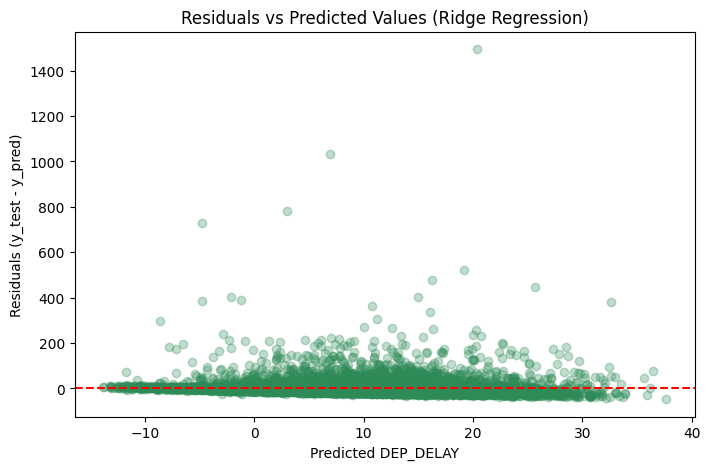

In [20]:
#--------------------------------------------------------#
# 6️⃣ Biểu đồ residuals
#--------------------------------------------------------#
residuals = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, residuals, alpha=0.3, color="seagreen")
plt.axhline(0, color="red", linestyle="--")
plt.title("Residuals vs Predicted Values (Ridge Regression)")
plt.xlabel("Predicted DEP_DELAY")
plt.ylabel("Residuals (y_test - y_pred)")
plt.show()